In [1]:
import numpy as np

In [2]:
import pandas as pd

# Object creation

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
dates = pd.date_range("20130101", periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [8]:
df

,A,B,C,D
2013-01-01,-0.317300,1.757353,0.708335,0.436867
2013-01-02,-1.494795,-0.453399,-0.877815,-1.810928
2013-01-03,-0.570533,-0.467858,-0.570223,-0.565771
2013-01-04,1.542522,-0.116300,-0.167505,0.958369
2013-01-05,0.529712,0.063794,-0.188563,-1.804409
2013-01-06,-0.624102,-0.049811,0.048721,0.146909


In [9]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing data

In [12]:
df.head()

,A,B,C,D
2013-01-01,-0.317300,1.757353,0.708335,0.436867
2013-01-02,-1.494795,-0.453399,-0.877815,-1.810928
2013-01-03,-0.570533,-0.467858,-0.570223,-0.565771
2013-01-04,1.542522,-0.116300,-0.167505,0.958369
2013-01-05,0.529712,0.063794,-0.188563,-1.804409


In [13]:
df.tail(3)

,A,B,C,D
2013-01-04,1.542522,-0.116300,-0.167505,0.958369
2013-01-05,0.529712,0.063794,-0.188563,-1.804409
2013-01-06,-0.624102,-0.049811,0.048721,0.146909


In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.to_numpy()

array([[-0.31729953,  1.75735285,  0.7083345 ,  0.43686697],
       [-1.49479492, -0.45339857, -0.87781502, -1.81092849],
       [-0.57053289, -0.4678585 , -0.57022311, -0.56577065],
       [ 1.54252243, -0.1162996 , -0.1675054 ,  0.95836892],
       [ 0.52971247,  0.06379427, -0.18856278, -1.80440898],
       [-0.62410218, -0.04981058,  0.04872119,  0.14690902]])

In [17]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

numpy 所有数据是一个类型，pandas中数据一列是一个类型，转化后不包含index列

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.155749,0.122297,-0.174508,-0.439827
std,1.054943,0.829830,0.544191,1.168389
min,-1.494795,-0.467858,-0.877815,-1.810928
25%,-0.610710,-0.369124,-0.474808,-1.494749
50%,-0.443916,-0.083055,-0.178034,-0.209431
75%,0.317959,0.035393,-0.005335,0.364377
max,1.542522,1.757353,0.708335,0.958369


In [19]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.317300,-1.494795,-0.570533,1.542522,0.529712,-0.624102
B,1.757353,-0.453399,-0.467858,-0.116300,0.063794,-0.049811
C,0.708335,-0.877815,-0.570223,-0.167505,-0.188563,0.048721
D,0.436867,-1.810928,-0.565771,0.958369,-1.804409,0.146909


In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.436867,0.708335,1.757353,-0.317300
2013-01-02,-1.810928,-0.877815,-0.453399,-1.494795
2013-01-03,-0.565771,-0.570223,-0.467858,-0.570533
2013-01-04,0.958369,-0.167505,-0.116300,1.542522
2013-01-05,-1.804409,-0.188563,0.063794,0.529712
2013-01-06,0.146909,0.048721,-0.049811,-0.624102


In [21]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,-0.570533,-0.467858,-0.570223,-0.565771
2013-01-02,-1.494795,-0.453399,-0.877815,-1.810928
2013-01-04,1.542522,-0.116300,-0.167505,0.958369
2013-01-06,-0.624102,-0.049811,0.048721,0.146909
2013-01-05,0.529712,0.063794,-0.188563,-1.804409
2013-01-01,-0.317300,1.757353,0.708335,0.436867


# Selection

## Getting

In [22]:
df["A"]

2013-01-01   -0.317300
2013-01-02   -1.494795
2013-01-03   -0.570533
2013-01-04    1.542522
2013-01-05    0.529712
2013-01-06   -0.624102
Freq: D, Name: A, dtype: float64

In [23]:
df.A

2013-01-01   -0.317300
2013-01-02   -1.494795
2013-01-03   -0.570533
2013-01-04    1.542522
2013-01-05    0.529712
2013-01-06   -0.624102
Freq: D, Name: A, dtype: float64

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,-0.317300,1.757353,0.708335,0.436867
2013-01-02,-1.494795,-0.453399,-0.877815,-1.810928
2013-01-03,-0.570533,-0.467858,-0.570223,-0.565771


In [25]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-1.494795,-0.453399,-0.877815,-1.810928
2013-01-03,-0.570533,-0.467858,-0.570223,-0.565771
2013-01-04,1.542522,-0.116300,-0.167505,0.958369


## Selection by label

In [26]:
df.loc[dates[0]]

A   -0.317300
B    1.757353
C    0.708335
D    0.436867
Name: 2013-01-01 00:00:00, dtype: float64

In [27]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.317300,1.757353
2013-01-02,-1.494795,-0.453399
2013-01-03,-0.570533,-0.467858
2013-01-04,1.542522,-0.116300
2013-01-05,0.529712,0.063794
2013-01-06,-0.624102,-0.049811


In [28]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-1.494795,-0.453399
2013-01-03,-0.570533,-0.467858
2013-01-04,1.542522,-0.116300


In [29]:
df.loc["20130102", ["A", "B"]]

A   -1.494795
B   -0.453399
Name: 2013-01-02 00:00:00, dtype: float64

In [30]:
df.loc[dates[0], "A"]

-0.3172995329944354

In [31]:
df.at[dates[0], "A"]

-0.3172995329944354

## Selection by position

In [32]:
df.iloc[3]

A    1.542522
B   -0.116300
C   -0.167505
D    0.958369
Name: 2013-01-04 00:00:00, dtype: float64

In [33]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.542522,-0.116300
2013-01-05,0.529712,0.063794


In [34]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.494795,-0.877815
2013-01-03,-0.570533,-0.570223
2013-01-05,0.529712,-0.188563


In [35]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.494795,-0.453399,-0.877815,-1.810928
2013-01-03,-0.570533,-0.467858,-0.570223,-0.565771


In [36]:
df.iloc[:, 1:3]

,B,C
2013-01-01,1.757353,0.708335
2013-01-02,-0.453399,-0.877815
2013-01-03,-0.467858,-0.570223
2013-01-04,-0.116300,-0.167505
2013-01-05,0.063794,-0.188563
2013-01-06,-0.049811,0.048721


In [37]:
df.iloc[1, 1]

-0.4533985696210392

In [38]:
df.iat[1, 1]

-0.4533985696210392

## Boolean indexing

In [39]:
df[df["A"] > 0]

,A,B,C,D
2013-01-04,1.542522,-0.116300,-0.167505,0.958369
2013-01-05,0.529712,0.063794,-0.188563,-1.804409


In [40]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.757353,0.708335,0.436867
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,1.542522,NaN,NaN,0.958369
2013-01-05,0.529712,0.063794,NaN,NaN
2013-01-06,NaN,NaN,0.048721,0.146909


In [41]:
df2 = df.copy()

In [42]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [43]:
df2

,A,B,C,D,E
2013-01-01,-0.317300,1.757353,0.708335,0.436867,one
2013-01-02,-1.494795,-0.453399,-0.877815,-1.810928,one
2013-01-03,-0.570533,-0.467858,-0.570223,-0.565771,two
2013-01-04,1.542522,-0.116300,-0.167505,0.958369,three
2013-01-05,0.529712,0.063794,-0.188563,-1.804409,four
2013-01-06,-0.624102,-0.049811,0.048721,0.146909,three


In [44]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.570533,-0.467858,-0.570223,-0.565771,two
2013-01-05,0.529712,0.063794,-0.188563,-1.804409,four


## Setting

In [45]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))


In [46]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [47]:
df["F"] = s1

In [48]:
df.at[dates[0], "A"] = 0

In [49]:
df.iat[0, 1] = 0

In [50]:
df.loc[:, "D"] = np.array([5] * len(df))

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.708335,5,NaN
2013-01-02,-1.494795,-0.453399,-0.877815,5,1.0
2013-01-03,-0.570533,-0.467858,-0.570223,5,2.0
2013-01-04,1.542522,-0.116300,-0.167505,5,3.0
2013-01-05,0.529712,0.063794,-0.188563,5,4.0
2013-01-06,-0.624102,-0.049811,0.048721,5,5.0


In [52]:
df2 = df.copy()

In [53]:
df2[df2 > 0] = -df2

In [54]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.708335,-5,NaN
2013-01-02,-1.494795,-0.453399,-0.877815,-5,-1.0
2013-01-03,-0.570533,-0.467858,-0.570223,-5,-2.0
2013-01-04,-1.542522,-0.116300,-0.167505,-5,-3.0
2013-01-05,-0.529712,-0.063794,-0.188563,-5,-4.0
2013-01-06,-0.624102,-0.049811,-0.048721,-5,-5.0


# Missing data

In [55]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [56]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [57]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.708335,5,NaN,1.0
2013-01-02,-1.494795,-0.453399,-0.877815,5,1.0,1.0
2013-01-03,-0.570533,-0.467858,-0.570223,5,2.0,NaN
2013-01-04,1.542522,-0.116300,-0.167505,5,3.0,NaN


In [58]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-1.494795,-0.453399,-0.877815,5,1.0,1.0


In [59]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.708335,5,5.0,1.0
2013-01-02,-1.494795,-0.453399,-0.877815,5,1.0,1.0
2013-01-03,-0.570533,-0.467858,-0.570223,5,2.0,5.0
2013-01-04,1.542522,-0.116300,-0.167505,5,3.0,5.0


In [60]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operation

## Stats

In [61]:
df.mean()

A   -0.102866
B   -0.170595
C   -0.174508
D    5.000000
F    3.000000
dtype: float64

In [62]:
df.mean(1)

2013-01-01    1.427084
2013-01-02    0.634798
2013-01-03    1.078277
2013-01-04    1.851743
2013-01-05    1.880989
2013-01-06    1.874962
Freq: D, dtype: float64

In [63]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)  # 向下移动两位，空出来的填充NaN

In [64]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [65]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.570533,-1.467858,-1.570223,4.0,1.0
2013-01-04,-1.457478,-3.116300,-3.167505,2.0,0.0
2013-01-05,-4.470288,-4.936206,-5.188563,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

In [66]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.708335,5,NaN
2013-01-02,-1.494795,-0.453399,-0.169481,10,1.0
2013-01-03,-2.065328,-0.921257,-0.739704,15,3.0
2013-01-04,-0.522805,-1.037557,-0.907209,20,6.0
2013-01-05,0.006907,-0.973762,-1.095772,25,10.0
2013-01-06,-0.617195,-1.023573,-1.047051,30,15.0


In [67]:
df.apply(lambda x: x.max() - x.min())

A    3.037317
B    0.531653
C    1.586150
D    0.000000
F    4.000000
dtype: float64

## Histogramming

In [68]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [69]:
s

0    4
1    3
2    1
3    1
4    2
5    2
6    4
7    6
8    1
9    6
dtype: int64

In [70]:
s.value_counts()

1    3
4    2
2    2
6    2
3    1
dtype: int64

## String Methods

In [71]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [72]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

## Concat

In [73]:
df = pd.DataFrame(np.random.randn(10, 4))

In [74]:
df

,0,1,2,3
0,-0.717193,-1.592368,-0.862401,-0.245681
1,1.223390,-0.646856,-0.497573,-2.209927
2,-1.821392,-0.512602,0.101182,-0.580960
3,-1.394996,0.186057,0.547674,0.751432
4,-0.417578,-0.638357,-1.098413,0.211869
5,0.555439,-0.207410,-0.426014,-0.132298
6,0.718762,-1.293304,0.228296,-0.375031
7,-0.091536,0.121505,-0.140373,-1.849350
8,0.075612,-0.437621,0.296327,0.271792
9,0.285124,-0.370039,-1.093699,0.931405


In [75]:
pieces = [df[:3], df[3:7], df[7:]]

In [76]:
pieces

[          0         1         2         3
 0 -0.717193 -1.592368 -0.862401 -0.245681
 1  1.223390 -0.646856 -0.497573 -2.209927
 2 -1.821392 -0.512602  0.101182 -0.580960,
           0         1         2         3
 3 -1.394996  0.186057  0.547674  0.751432
 4 -0.417578 -0.638357 -1.098413  0.211869
 5  0.555439 -0.207410 -0.426014 -0.132298
 6  0.718762 -1.293304  0.228296 -0.375031,
           0         1         2         3
 7 -0.091536  0.121505 -0.140373 -1.849350
 8  0.075612 -0.437621  0.296327  0.271792
 9  0.285124 -0.370039 -1.093699  0.931405]

In [77]:
pd.concat(pieces)

,0,1,2,3
0,-0.717193,-1.592368,-0.862401,-0.245681
1,1.223390,-0.646856,-0.497573,-2.209927
2,-1.821392,-0.512602,0.101182,-0.580960
3,-1.394996,0.186057,0.547674,0.751432
4,-0.417578,-0.638357,-1.098413,0.211869
5,0.555439,-0.207410,-0.426014,-0.132298
6,0.718762,-1.293304,0.228296,-0.375031
7,-0.091536,0.121505,-0.140373,-1.849350
8,0.075612,-0.437621,0.296327,0.271792
9,0.285124,-0.370039,-1.093699,0.931405


## Join

In [78]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [79]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [80]:
left

,key,lval
0,foo,1
1,foo,2


In [81]:
right

,key,rval
0,foo,4
1,foo,5


In [82]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [83]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [84]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})


In [85]:
left

,key,lval
0,foo,1
1,bar,2


In [86]:
right

,key,rval
0,foo,4
1,bar,5


In [87]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping

Splitting the data into groups based on some criteria

Applying a function to each group independently

Combining the results into a data structure

In [88]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [89]:
df

,A,B,C,D
0,foo,one,0.517076,0.569303
1,bar,one,-0.533326,1.054405
2,foo,two,0.354627,0.065995
3,bar,three,-1.555273,1.223536
4,foo,two,0.318868,-1.219042
5,bar,two,-0.385369,0.279294
6,foo,one,-0.320995,-0.707975
7,foo,three,-0.513513,1.046239


In [90]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-2.473968,2.557234
foo,0.356063,-0.245480


In [91]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.533326  1.054405
    three -1.555273  1.223536
    two   -0.385369  0.279294
foo one    0.196081 -0.138672
    three -0.513513  1.046239
    two    0.673495 -1.153047

# Reshaping

## Stack

In [92]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

In [93]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [94]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [95]:
df2 = df[:4]

In [96]:
df2

A         B
first second                    
bar   one     0.684933 -1.613121
      two     0.251761 -0.023312
baz   one     2.038355  0.311662
      two     0.103876 -0.256610

In [97]:
stacked = df2.stack()

In [98]:
stacked

first  second   
bar    one     A    0.684933
               B   -1.613121
       two     A    0.251761
               B   -0.023312
baz    one     A    2.038355
               B    0.311662
       two     A    0.103876
               B   -0.256610
dtype: float64

In [99]:
stacked.unstack()

A         B
first second                    
bar   one     0.684933 -1.613121
      two     0.251761 -0.023312
baz   one     2.038355  0.311662
      two     0.103876 -0.256610

by default unstacks the last level:

In [100]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.684933  0.251761
      B -1.613121 -0.023312
baz   A  2.038355  0.103876
      B  0.311662 -0.256610

In [101]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.684933  2.038355
       B -1.613121  0.311662
two    A  0.251761  0.103876
       B -0.023312 -0.256610

## Pivot tables

In [102]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

In [103]:
df

,A,B,C,D,E
0,one,A,foo,-1.434051,0.772260
1,one,B,foo,0.282260,-1.185023
2,two,C,foo,1.782084,-0.285320
3,three,A,bar,0.614081,-0.077201
4,one,B,bar,0.272956,0.723388
5,one,C,bar,-0.886168,0.914594
6,two,A,foo,0.517441,-0.296394
7,three,B,foo,2.367858,1.050489
8,one,C,foo,1.147068,1.272787
9,one,A,bar,1.751512,0.711609


In [104]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  1.751512 -1.434051
      B  0.272956  0.282260
      C -0.886168  1.147068
three A  0.614081       NaN
      B       NaN  2.367858
      C  0.611418       NaN
two   A       NaN  0.517441
      B -0.151642       NaN
      C       NaN  1.782084

# Time series

In [105]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [106]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [107]:
ts

2012-01-01 00:00:00    388
2012-01-01 00:00:01    107
2012-01-01 00:00:02    385
2012-01-01 00:00:03    434
2012-01-01 00:00:04    348
                      ... 
2012-01-01 00:01:35    127
2012-01-01 00:01:36    328
2012-01-01 00:01:37    302
2012-01-01 00:01:38    108
2012-01-01 00:01:39     11
Freq: S, Length: 100, dtype: int64

In [108]:
ts.resample("5Min").sum()

2012-01-01    22936
Freq: 5T, dtype: int64

In [109]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [110]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [111]:
ts

2012-03-06   -0.028641
2012-03-07    1.030255
2012-03-08    1.426753
2012-03-09   -1.045297
2012-03-10   -1.360537
Freq: D, dtype: float64

In [112]:
ts_utc = ts.tz_localize("UTC")

In [113]:
ts_utc

2012-03-06 00:00:00+00:00   -0.028641
2012-03-07 00:00:00+00:00    1.030255
2012-03-08 00:00:00+00:00    1.426753
2012-03-09 00:00:00+00:00   -1.045297
2012-03-10 00:00:00+00:00   -1.360537
Freq: D, dtype: float64

In [114]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.028641
2012-03-06 19:00:00-05:00    1.030255
2012-03-07 19:00:00-05:00    1.426753
2012-03-08 19:00:00-05:00   -1.045297
2012-03-09 19:00:00-05:00   -1.360537
Freq: D, dtype: float64

In [115]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

In [116]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [117]:
ts

2012-01-31    0.593784
2012-02-29   -1.355357
2012-03-31   -0.739341
2012-04-30    0.690945
2012-05-31    0.240414
Freq: M, dtype: float64

In [118]:
ps = ts.to_period()

In [119]:
ps

2012-01    0.593784
2012-02   -1.355357
2012-03   -0.739341
2012-04    0.690945
2012-05    0.240414
Freq: M, dtype: float64

In [120]:
ps.to_timestamp()

2012-01-01    0.593784
2012-02-01   -1.355357
2012-03-01   -0.739341
2012-04-01    0.690945
2012-05-01    0.240414
Freq: MS, dtype: float64

In [121]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

In [122]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [123]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

In [124]:
ts.head()

1990-03-01 09:00   -1.022606
1990-06-01 09:00    0.009647
1990-09-01 09:00   -0.108810
1990-12-01 09:00    0.533625
1991-03-01 09:00    0.451879
Freq: H, dtype: float64

# Categoricals

In [125]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)


In [126]:
df["grade"] = df["raw_grade"].astype("category")


In [127]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [128]:
new_categories = ["very good", "good", "very bad"]

In [129]:
df["grade"] = df["grade"].cat.rename_categories(new_categories)

In [130]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [131]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [132]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [133]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [134]:
import matplotlib.pyplot as plt

In [135]:
plt.close("all")

In [136]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [137]:
ts = ts.cumsum()

<AxesSubplot:>

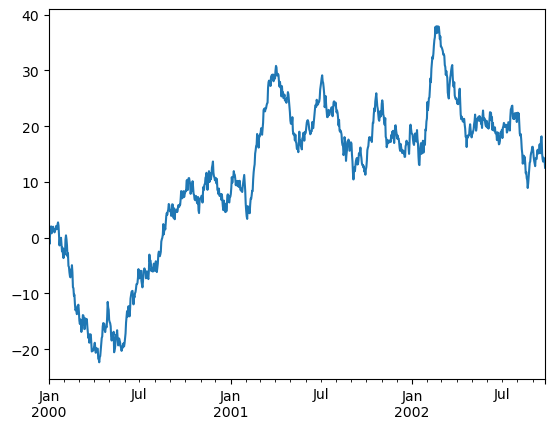

In [138]:
ts.plot()

In [139]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [140]:
df = df.cumsum()


In [141]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

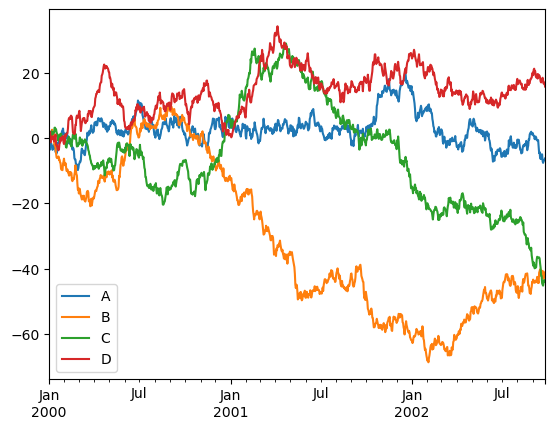

In [142]:
df.plot()
plt.legend(loc='best')

# Importing and exporting data

## CSV


In [143]:
df.to_csv("foo.csv")

In [144]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.932358,-1.217080,-0.346154,1.054275
1,2000-01-02,-3.721994,0.667845,-0.950746,1.752486
2,2000-01-03,-1.974448,0.998062,0.622790,1.934885
3,2000-01-04,-1.862566,0.839415,1.115859,-1.370350
4,2000-01-05,-1.645953,1.671856,0.644402,-0.873433
...,...,...,...,...,...
995,2002-09-22,-7.640475,-42.507255,-45.214756,17.549464
996,2002-09-23,-6.957661,-43.082422,-44.188369,16.607094
997,2002-09-24,-6.903480,-41.587502,-43.521997,16.964962
998,2002-09-25,-6.558015,-41.580515,-43.546946,16.759294


In [145]:
df.to_hdf("foo.h5", "df")

In [146]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-1.932358,-1.217080,-0.346154,1.054275
2000-01-02,-3.721994,0.667845,-0.950746,1.752486
2000-01-03,-1.974448,0.998062,0.622790,1.934885
2000-01-04,-1.862566,0.839415,1.115859,-1.370350
2000-01-05,-1.645953,1.671856,0.644402,-0.873433
...,...,...,...,...
2002-09-22,-7.640475,-42.507255,-45.214756,17.549464
2002-09-23,-6.957661,-43.082422,-44.188369,16.607094
2002-09-24,-6.903480,-41.587502,-43.521997,16.964962
2002-09-25,-6.558015,-41.580515,-43.546946,16.759294


## Excel

In [147]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [148]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.932358,-1.217080,-0.346154,1.054275
1,2000-01-02,-3.721994,0.667845,-0.950746,1.752486
2,2000-01-03,-1.974448,0.998062,0.622790,1.934885
3,2000-01-04,-1.862566,0.839415,1.115859,-1.370350
4,2000-01-05,-1.645953,1.671856,0.644402,-0.873433
...,...,...,...,...,...
995,2002-09-22,-7.640475,-42.507255,-45.214756,17.549464
996,2002-09-23,-6.957661,-43.082422,-44.188369,16.607094
997,2002-09-24,-6.903480,-41.587502,-43.521997,16.964962
998,2002-09-25,-6.558015,-41.580515,-43.546946,16.759294
